# CAPSTONE


#### Instructions:
Write python codes to answer all the 7 questions. 
Save the python notebook as (.ipynb) file.
Prepare power point slides to present the output of every question.
One group needs to submit only one folder including python notebook and power point slides and upload to the submission folder. 

#### Perform data cleaning/ pre-processing before starting the data analysis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import glob
import os
import janitor as jn
import statistics as st
from scipy.stats import norm, poisson, uniform, skew, kurtosis, iqr 
import string

Question 1: Load the given data and **describe** the dataset using variable type, data type, total column, total rows and other parameters. 

In [2]:
xlsx = pd.ExcelFile('./data/Supply chain logisitcs problem.xlsx')

for sheet in xlsx.sheet_names:
    globals()[f"{sheet}_data"] = pd.DataFrame(xlsx.parse(sheet))

In [3]:
sheetname =[]
for sheet in xlsx.sheet_names:
    sheetname.append(f"{sheet}_data")

print(sheetname)

['OrderList_data', 'FreightRates_data', 'WhCosts_data', 'WhCapacities_data', 'ProductsPerPlant_data', 'VmiCustomers_data', 'PlantPorts_data']


In [4]:
OrderList_data.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [5]:
OrderList_data['Service Level'].unique()
# DTD (Door to Door), DTP (Door to Port) or CRF (Customer Referred Freight)

array(['CRF', 'DTP', 'DTD'], dtype=object)

In [6]:
# print(OrderList_data.value_counts())
print(OrderList_data.info())
OrderList_data.describe([])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              9215 non-null   float64       
 1   Order Date            9215 non-null   datetime64[ns]
 2   Origin Port           9215 non-null   object        
 3   Carrier               9215 non-null   object        
 4   TPT                   9215 non-null   int64         
 5   Service Level         9215 non-null   object        
 6   Ship ahead day count  9215 non-null   int64         
 7   Ship Late Day count   9215 non-null   int64         
 8   Customer              9215 non-null   object        
 9   Product ID            9215 non-null   int64         
 10  Plant Code            9215 non-null   object        
 11  Destination Port      9215 non-null   object        
 12  Unit quantity         9215 non-null   int64         
 13  Weight            

,Order ID,TPT,Ship ahead day count,Ship Late Day count,Product ID,Unit quantity,Weight
count,9.215000e+03,9215.000000,9215.000000,9215.000000,9.215000e+03,9215.000000,9215.000000
mean,1.447274e+09,1.717743,1.852306,0.039935,1.680536e+06,3202.747151,19.871688
std,8.381629e+04,0.630500,1.922302,0.319625,1.526593e+04,15965.622260,66.569064
min,1.447126e+09,0.000000,0.000000,0.000000,1.613321e+06,235.000000,0.000000
50%,1.447276e+09,2.000000,3.000000,0.000000,1.683636e+06,477.000000,4.440000
max,1.447425e+09,4.000000,6.000000,6.000000,1.702654e+06,561847.000000,2338.405126


Question 2: Describe the **categorical variables** available in the dataset.  **Visualise** the results based on your creativity. 

<AxesSubplot:title={'center':'Plant Code by Count'}>

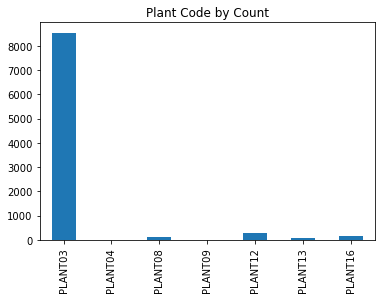

In [7]:
OrderList_data['Plant Code'].value_counts().sort_index().plot.bar(title = "Plant Code by Count")

***PLANT03 is the most famous products.***

<AxesSubplot:title={'center':'Transportation Day by Count'}>

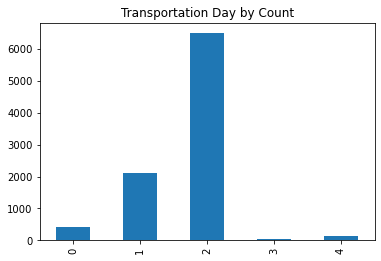

In [8]:
OrderList_data['TPT'].value_counts().sort_index().plot.bar(title = "Transportation Day by Count")

***From the chart above, it shows that customer will usually receive their order after 2 days of shipping process***

<AxesSubplot:title={'center':'Service Level by Count'}>

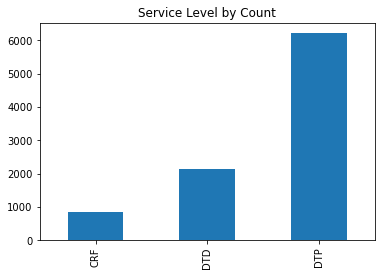

In [9]:
OrderList_data['Service Level'].value_counts().sort_index().plot.bar(title = "Service Level by Count")

***Customer always choose DTP(Door to Port) service***

Question 3: Present the **distribution** of each variable in the dataset. **Interpret** the results.

In [10]:
OrderList_data.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [11]:
# df = OrderList_data.drop('')
df = OrderList_data.copy()
df = df.pivot_longer(index=None,
                   column_names = ['Weight','Unit quantity'], #,'Ship ahead day count','Ship Late Day count'
                   names_to = 'variables',
                   values_to = 'value'
                  )

summ_df = df.groupby("variables").agg(['mean', 'median'])
df = df[['variables', 'value']]
df

,variables,value
0,Weight,14.30
1,Weight,87.94
2,Weight,61.20
3,Weight,16.16
4,Weight,52.34
...,...,...
18425,Unit quantity,339.00
18426,Unit quantity,339.00
18427,Unit quantity,245.00
18428,Unit quantity,278.00


In [12]:
max(df[df['variables']=='Unit quantity']['value'])

561847.0

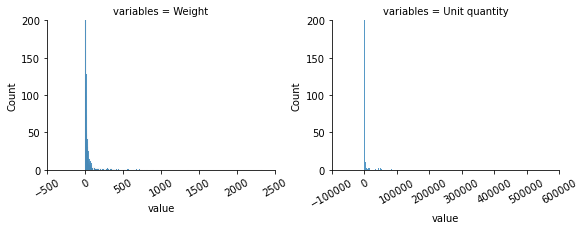

In [13]:
g = sns.FacetGrid(df, col = "variables", sharex = False, sharey = False, col_wrap = 4, margin_titles=True, height=3, aspect=1.33)
g.map(sns.histplot, "value")
g.set(ylim=(0,200))
g.set_xticklabels(rotation=30)

In [14]:
w = df[df['variables']=='Unit quantity']
w = w.sort_values('value')
# plt.plot(w['value'], norm.pdf(w['value']));

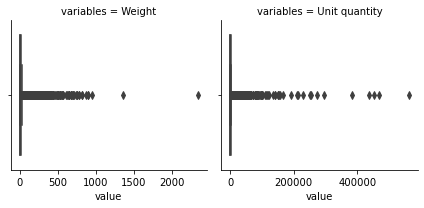

In [15]:
g = sns.FacetGrid(df, col = "variables", sharex = False)
g.map(sns.boxplot, "value", order = df.variables.unique());  ####lots of outliers

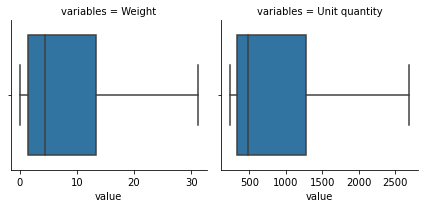

In [16]:
g = sns.FacetGrid(df, col = "variables", sharex = False)
g.map(sns.boxplot, "value", order = df.variables.unique(), showfliers = False);  ### show without outliers

In [17]:
df.groupby("variables").agg(lambda x: skew(x, bias = False))

,value
variables,
Unit quantity,18.138895
Weight,11.126610


Question 4: Present the **correlation** between all the **numeric variables**. **Explain** the relationship between the variables using correlation values.

In [18]:
OrderList_data.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [19]:
corr_df = OrderList_data.drop(['Order ID', 'Order Date','Origin Port','Carrier','TPT','Service Level','Customer','Product ID','Plant Code','Destination Port'], axis =1)
corr_df.corr()

,Ship ahead day count,Ship Late Day count,Unit quantity,Weight
Ship ahead day count,1.000000,-0.022371,-0.073901,0.018590
Ship Late Day count,-0.022371,1.000000,-0.015532,-0.017252
Unit quantity,-0.073901,-0.015532,1.000000,0.344520
Weight,0.018590,-0.017252,0.344520,1.000000


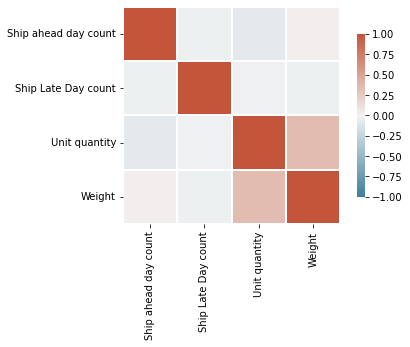

In [20]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
        data=corr_df.corr(),  # our correlation matrix
        linewidths=0.3,  # the width of lines separating the matrix squares
        square=True,   # enforce 1:1 ratios among correlation cells
        cmap=cmap,  # use the color map we defined above
        vmax=1,  # define the max of our correlation scale
        vmin=-1, # define the min of our correlation scale
        center=0,  # The value at which the color map is centered about (white)
        cbar_kws={"shrink": .75}  # shrink the scale a bit
    )
# adjust y-axis ticks for legibility
plt.xticks(rotation=90)

# show the heatmap
plt.show()

Question 5: Calculate the measures of **central tendancy** and **measures of dispersion** for all the numerical variables. <br>
1. Central tendancy: Mean, median, mode
2. Measure of dispersion: Variance, Standard Deviation

In [21]:
display("Mean:",pd.DataFrame(corr_df.mean()).T)
display("Median:",pd.DataFrame(corr_df.median()).T)
display("Mode:",corr_df.mode())
display("Variance:",pd.DataFrame(corr_df.var()).T)
display("Standard Deviation:",pd.DataFrame(corr_df.std()).T)

'Mean:'

,Ship ahead day count,Ship Late Day count,Unit quantity,Weight
0,1.852306,0.039935,3202.747151,19.871688


'Median:'

,Ship ahead day count,Ship Late Day count,Unit quantity,Weight
0,3.0,0.0,477.0,4.44


'Mode:'

,Ship ahead day count,Ship Late Day count,Unit quantity,Weight
0,0,0,334,4.404492


'Variance:'

,Ship ahead day count,Ship Late Day count,Unit quantity,Weight
0,3.695245,0.10216,2.549011e+08,4431.440237


'Standard Deviation:'

,Ship ahead day count,Ship Late Day count,Unit quantity,Weight
0,1.922302,0.319625,15965.62226,66.569064


Question 6: Consider the given data as entity 1. Design **two more related entities** (entity 2 and entity 3) and design one entity relationship diagram to relate all the three entities.  <br>
1. create the variable , but no need the data values

In [22]:
%load_ext sql

In [23]:
%sql sqlite:///supply-chain.db

In [24]:
import sqlite3
import sqlalchemy as sqla

conn = sqlite3.connect('supply-chain.db')
c = conn.cursor()

In [25]:
OrderList_data.columns = OrderList_data.columns.str.replace(' ', '')
WhCosts_data.columns = WhCosts_data.columns.str.replace(' ', '')
ProductsPerPlant_data.columns = ProductsPerPlant_data.columns.str.replace(' ', '')

In [26]:
# orders table
c = sqlite3.connect('supply-chain.db')
c.execute(

    """
CREATE TABLE orders (
    OrderID TEXT,
    OrderDate DATE,
    OriginPort TEXT NOT NULL,
    Carrier TEXT NOT NULL,
    TPT INTEGER,
    ServiceLevel TEXT NOT NULL,
    ShipAheadDayCount INTEGER,
    ShipLateDayCount INTEGER,
    Customer TEXT NOT NULL,
    ProductID TEXT,
    PlantCode TEXT,
    DestinationPort TEXT,
    UnitQuantity INTEGER,
    Weight REAL,
    PRIMARY KEY(OrderID),
    FOREIGN KEY(ProductID) REFERENCES products(ProductID),
    FOREIGN KEY(PlantCode) REFERENCES costs(PlantCode)
    );
    
    """
    )


# costs table

c.execute(

    """
CREATE TABLE costs (
    PlantCode TEXT,
    CostPerUnit REAL,
    PRIMARY KEY(PlantCode)
    );
    
    """
    )

In [49]:
c = sqlite3.connect('supply-chain.db')
# products table

c.execute(

    """
CREATE TABLE products (
    ID TEXT,
    ProductID TEXT,
    PlantCode TEXT,
    PRIMARY KEY(ID)
    FOREIGN KEY(PlantCode) REFERENCES costs(PlantCode)
    );
    
    """
    )


In [43]:
# transfers the data from each of the four data frames into the appropriate tables in the database
OrderList_data.to_sql('orders', conn, if_exists='append', index=False)

In [44]:
ProductsPerPlant_data['ID'] = ProductsPerPlant_data.index

In [45]:
ProductsPerPlant_data = ProductsPerPlant_data.reindex(columns=['ID', 'PlantCode', 'ProductID'])

In [52]:
WhCosts_data.columns = ['PlantCode','CostPerUnit']

In [53]:
WhCosts_data.to_sql('costs', conn, if_exists='append', index=False)

In [54]:
ProductsPerPlant_data.to_sql('products', conn, if_exists='append', index=False)

In [89]:
%%sql 
SELECT * FROM orders LIMIT 3

 * sqlite:///supply-chain.db
Done.


OrderID,OrderDate,OriginPort,Carrier,TPT,ServiceLevel,ShipAheadDayCount,ShipLateDayCount,Customer,ProductID,PlantCode,DestinationPort,UnitQuantity,Weight
1447296446.7,2013-05-26 00:00:00,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.3
1447158014.7,2013-05-26 00:00:00,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
1447138898.7,2013-05-26 00:00:00,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.2


Question 7: Develop **3 problem statements** for the given dataset.

In [86]:
### What are the top 3 products shipped among the period?
### Which product has the highest cost and how much?
### Which service level is most choosen as their shipping method?

Question 8: Write **3 different SQL statements** to extract specific data from entity1, entity 2 and entity 3 to solve the problems designed in **Question 7**. (combine data from different tables) <br>
1. what can be observe from the entity 
2. then how to resolve it by using sql?

#### What are the top 3 products shipped among the period?

In [67]:
%%sql
SELECT ProductID, PlantCode, COUNT(ProductID) FROM orders
GROUP BY ProductID
ORDER BY COUNT(ProductID) DESC
LIMIT 3;

 * sqlite:///supply-chain.db
Done.


ProductID,PlantCode,COUNT(ProductID)
1689547,PLANT03,192
1677878,PLANT03,140
1689548,PLANT03,133


#### Which product has the highest cost and how much?

In [79]:
%%sql
SELECT orders.ProductID, orders.PlantCode, orders.UnitQuantity,  costs.CostPerUnit, ROUND((orders.UnitQuantity * costs.CostPerUnit),2) as [Total Price] FROM orders
LEFT JOIN costs 
ON orders.PlantCode = costs.PlantCode
GROUP BY orders.PlantCode
ORDER BY [Total Price] DESC
LIMIT 1;

 * sqlite:///supply-chain.db
Done.


ProductID,PlantCode,UnitQuantity,CostPerUnit,Total Price
1695862,PLANT09,14293,0.46507109738293506,6647.26


#### Which service level is most choosen as their shipping method?

In [82]:
%%sql
SELECT ServiceLevel, COUNT(ServiceLevel) FROM orders
GROUP BY ServiceLevel
ORDER BY COUNT(ServiceLevel) DESC;

 * sqlite:///supply-chain.db
Done.


ServiceLevel,COUNT(ServiceLevel)
DTP,6218
DTD,2143
CRF,854
